In [1]:
# Setup plotting environment
%matplotlib inline
import matplotlib.pyplot as plt
# use seaborn for nice default plot settings
import seaborn; seaborn.set_style('ticks')

In [2]:
# Importing manupulation packages
import numpy as np
# Reproducible results
#np.random.seed(12345)
import scipy.stats as stat

(200,)
(200,)
(200,)


<Container object of 3 artists>

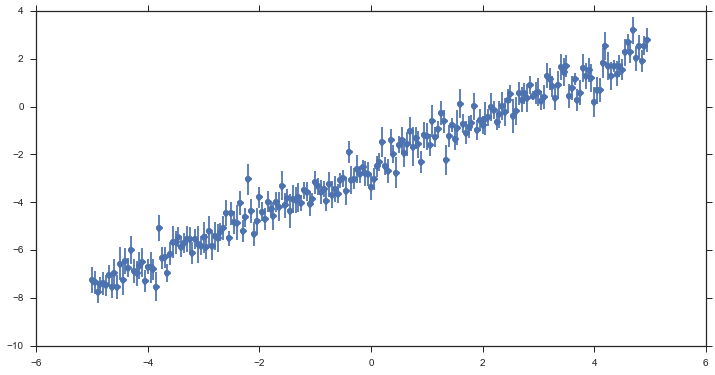

In [3]:
# Generating fake data
def lin_law(t, a, b):
    return a * t + b 

x = np.arange(-5, 5, 0.05)

mu_err, sigma_err = 0.5, 0.1 # mean and standard deviation
y_err = np.array(np.random.normal(mu_err, sigma_err, len(x))).ravel()

y = np.array(lin_law(x, 1, -2.5) + y_err * np.random.randn(len(x)))
print(np.shape(y_err))
print(np.shape(y))
print(np.shape(x))

fig, ax = plt.subplots(1, figsize=(12,6), dpi=2400)



ax.errorbar(x, y, yerr=y_err, fmt='o')


(1.0078306920307543, 0.00012696707331727819)
(1.002708910304636, 0.012462996549222408)


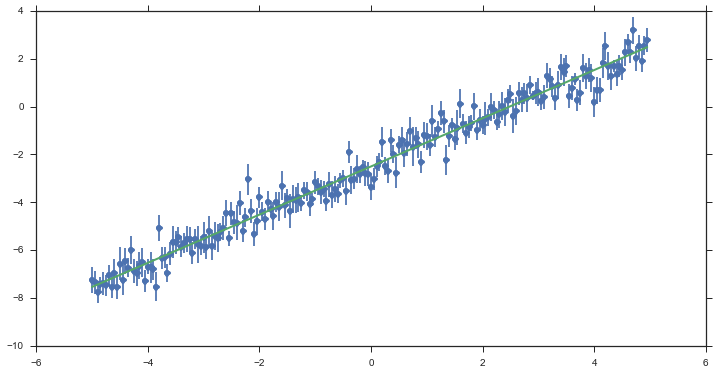

In [25]:
fig, ax = plt.subplots(1, figsize=(12,6), dpi=2400)
from scipy.optimize import curve_fit

popt1, pcov1 = curve_fit(lin_law, x, y, sigma=y_err, absolute_sigma=True)
print((popt1[0], np.diag(pcov1)[0]))
ax.errorbar(x, y, yerr=y_err, fmt='o')
ax.plot(x, lin_law(x, *popt1), lw=2)

n_resamples = 100
slope = []
for n in range(n_resamples):
    
    y_resamp = y + y_err * np.random.randn(len(x))
    
    popt2, pcov2 = curve_fit(lin_law, x, y_resamp)
    slope.append((popt2[0]))
    
    #ax.plot(x, y_resamp, lw=5.0/np.sqrt(n_resamples), alpha=2.0/np.sqrt(n_resamples), color='grey')

print(np.mean(slope), np.std(slope))    
